Of all the countries that have participated in the survey:
Which country has the highest/lowest SWL levels 
Do these countries have anything in common -SWL levels, gender, motivations, hours of play,etc

Things to note:
about 2k lines were dropped from the original data b/c of N/A's


Notes of each test:

GAD-7 (Generalized Anxiety Disorder) 
Total scores:
0-4 = Minimal Anxiety
5-9 = Mild Anxiety
10-14 = Moderate Anxiety
15+ = Severe Anxiety

SWL (Satisfaction with Life)
5-9 = Extremely dissatisfied
10-14 = dissatisfied
15-19 = Slightly Dissatisifed
20 = Neutral
21-25 = Slightly Satisfied
26-30 = Satisfied
31-35 = Extremely Satisfied

SPIN (Social Phobia Inventory)
0-20 = None
21-30 = Mild
31-40 = Moderate
41-50 = Severe
51-68 = Very Severe

In [36]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress
import random


In [37]:
#reference file path
data = Path("../data_cleanup/Gaming.csv")

#import data into dataframe
gaming_df = pd.read_csv(data, encoding="UTF-8")

gaming_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


In [38]:
#checking all columns
gaming_df.columns

Index(['Unnamed: 0', 'Entry', 'Gender', 'Age', 'Residence', 'Birthplace',
       'Work', 'Degree', 'Game', 'Hours per Week', 'Gaming Motivation',
       'Playstyle', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
       'GAD Total', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
       'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
       'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
       'SPIN16', 'SPIN17', 'SPIN Total'],
      dtype='object')

In [39]:
#displaying some statstical overview of the dataframe
gaming_df.describe()

,Unnamed: 0,Entry,Age,Hours per Week,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
count,11138.000000,11138.00000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,...,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000
mean,6722.180373,7086.95044,21.245286,21.271772,0.861555,0.670408,0.955737,0.723739,0.478811,0.891183,...,1.542916,0.903304,1.799425,0.878793,0.517508,1.225714,1.386425,0.608817,0.917220,19.578829
std,3885.735144,4113.33012,3.311245,13.388136,0.926330,0.914651,0.976108,0.921978,0.829633,0.922522,...,1.385866,1.121867,1.487004,1.148347,0.927520,1.196526,1.344924,0.954125,1.170623,13.417905
min,0.000000,1.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3355.250000,3522.25000,19.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6725.500000,7080.50000,20.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,17.000000
75%,10077.750000,10630.75000,23.000000,28.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,28.000000
max,13463.000000,14250.00000,56.000000,140.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,68.000000


In [40]:
#total rows of gaming dataframe
len(gaming_df)

11138

In [41]:
#total genders
gcount=gaming_df["Gender"].value_counts()
gcount

Gender
Male      10463
Female      638
Other        37
Name: count, dtype: int64

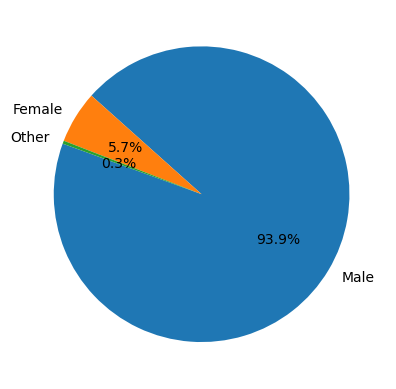

In [42]:
#pie chart of gender
plt.pie(gcount,labels=gcount.index,autopct="%1.1f%%",startangle=160);

In [43]:
#total countries listed in "Residence" column
rcount=gaming_df["Residence"].unique()
rcount

array(['USA', 'DEU', 'KOR', 'FIN', 'CAN', 'AUS', 'GBR', 'BIH', 'IRL',
       'MYS', 'ROU', 'SWE', 'TUR', 'BEL', 'LVA', 'AUT', 'JPN', 'ZAF',
       'HRV', 'CHE', 'IND', 'NLD', 'DNK', 'PRT', 'FRA', 'ARG', 'EST',
       'RUS', 'CZE', 'LTU', 'NOR', 'SGP', 'POL', 'CHN', 'SRB', 'MAR',
       'ESP', 'SAU', 'SVK', 'BGR', 'ITA', 'SVN', 'GRC', 'JOR', 'BRA',
       'VEN', 'TUN', 'ISR', 'QAT', 'UKR', 'MEX', 'PHL', 'HUN', 'NZL',
       'LUX', 'DZA', 'ARE', 'BLR', 'LBN', 'THA', 'CHL', 'EGY', 'PER',
       'NAM', 'URY', 'KWT', 'ISL', 'BGD', 'MLT', 'SYR', 'COL', 'DOM',
       'NIC', 'HKG', 'VNM', 'KAZ', 'ALB', 'GLP', 'GRD', 'TTO', 'MKD',
       'IDN', 'LIE', 'PRI', 'TWN', 'CRI', 'PAN', 'BLZ', 'JAM', 'GEO',
       'FRO', 'GTM', 'MDA', 'MNG', 'HND', 'MNE', 'BHR', 'BOL', 'SLV',
       'ECU', 'PAK', 'BRN', 'GIB', 'PSE'], dtype=object)

In [44]:
#count of those countries
len(rcount)

104

In [45]:
#total countries listed in "Residence" column
rcount=gaming_df["Residence"].value_counts()
rcount.head(25)

Residence
USA    3869
DEU    1155
GBR     862
CAN     855
NLD     424
FRA     358
SWE     298
BRA     238
AUS     211
DNK     209
PRT     193
ESP     190
POL     173
BEL     164
FIN     143
NOR     139
AUT     106
ARG      97
ITA      96
GRC      90
CHE      76
ROU      74
MEX      67
IRL      58
CHL      57
Name: count, dtype: int64

In [46]:
#listing the top 25 countries
top25=rcount.head(25).index.tolist()

#filtering dataframe for only the 25 countries
gaming25_df=gaming_df[gaming_df["Residence"].isin(top25)]
gaming25_df.head(15)


,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
5,5,6,Male,24,USA,USA,Employed,Bachelor (or equivalent),Other,4,...,0,1,0,0,0,1,1,0,0,13
6,6,7,Male,29,USA,USA,Employed,High school diploma (or equivalent),Other,30,...,3,1,3,1,0,1,2,1,1,26
7,8,9,Female,23,USA,USA,Employed,Bachelor (or equivalent),Other,2,...,3,3,4,4,2,4,4,2,3,55
8,9,10,Female,27,FIN,FIN,Employed,High school diploma (or equivalent),World of Warcraft,25,...,2,2,3,1,0,3,2,0,2,26
9,10,11,Female,21,USA,USA,Student at college / university,High school diploma (or equivalent),Other,14,...,0,0,0,0,0,2,1,0,0,6
10,11,12,Male,25,USA,USA,Employed,Bachelor (or equivalent),League of Legends,25,...,1,0,0,0,0,0,0,0,0,3


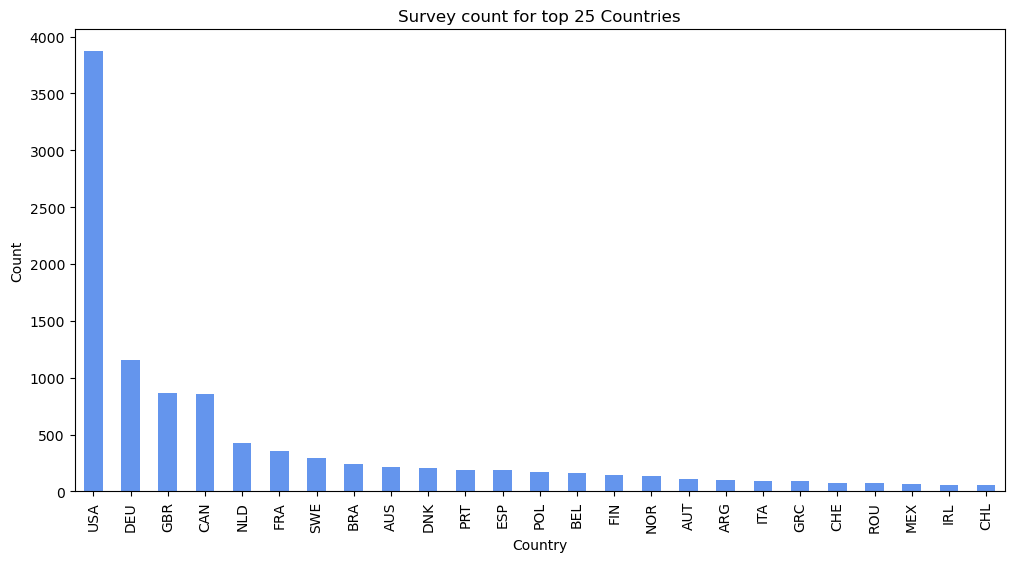

In [47]:
#bar graph that shows the count of rows per country
country_counts=gaming25_df["Residence"].value_counts()

plt.figure(figsize=(12,6))
country_counts.plot(kind="bar", color="cornflowerblue")
plt.title("Survey count for top 25 Countries")
plt.xlabel("Country")
plt.ylabel("Count");

In [48]:
#looking at top 25
top25

['USA',
 'DEU',
 'GBR',
 'CAN',
 'NLD',
 'FRA',
 'SWE',
 'BRA',
 'AUS',
 'DNK',
 'PRT',
 'ESP',
 'POL',
 'BEL',
 'FIN',
 'NOR',
 'AUT',
 'ARG',
 'ITA',
 'GRC',
 'CHE',
 'ROU',
 'MEX',
 'IRL',
 'CHL']

In [49]:
#checking how many rows are left
len(gaming25_df)

10202

In [50]:
#checking dtypes
gaming25_df.dtypes

Unnamed: 0            int64
Entry                 int64
Gender               object
Age                   int64
Residence            object
Birthplace           object
Work                 object
Degree               object
Game                 object
Hours per Week        int64
Gaming Motivation    object
Playstyle            object
GAD1                  int64
GAD2                  int64
GAD3                  int64
GAD4                  int64
GAD5                  int64
GAD6                  int64
GAD7                  int64
GAD Total             int64
SWL1                  int64
SWL2                  int64
SWL3                  int64
SWL4                  int64
SWL5                  int64
SWL Total             int64
SPIN1                 int64
SPIN2                 int64
SPIN3                 int64
SPIN4                 int64
SPIN5                 int64
SPIN6                 int64
SPIN7                 int64
SPIN8                 int64
SPIN9                 int64
SPIN10              

In [51]:
#empty list for avgs
gadavg=[]
swlavg=[]
spinavg=[]

# loop getting average for eacch studies "total" columns per country
for country in top25:
    #group by country
    country_grp=gaming25_df[gaming25_df['Residence']==country]
    #calculate avg for each total column
    gadavg.append(country_grp['GAD Total'].mean())
    swlavg.append(country_grp['SWL Total'].mean())
    spinavg.append(country_grp['SPIN Total'].mean())
   

avgsummary=pd.DataFrame({"Residence Country": top25,
                         "Average GAD Total":gadavg,
                         "Average SWL Total":swlavg,
                         "Average SPIN Total":spinavg})
avgsummary


,Residence Country,Average GAD Total,Average SWL Total,Average SPIN Total
0,USA,5.294650,20.182476,19.551305
1,DEU,4.747186,20.048485,18.531602
2,GBR,5.790023,18.885151,21.575406
3,CAN,5.134503,20.099415,20.111111
4,NLD,4.726415,20.469340,17.375000
5,FRA,4.650838,19.991620,18.991620
6,SWE,4.285235,19.610738,16.627517
7,BRA,5.827731,19.088235,23.033613
8,AUS,5.118483,19.417062,20.099526
9,DNK,4.200957,21.516746,16.133971


In [52]:
# setting the Residence Country as the index
avgsummary.set_index("Residence Country", inplace=True)
avgsummary

,Average GAD Total,Average SWL Total,Average SPIN Total
Residence Country,,,
USA,5.294650,20.182476,19.551305
DEU,4.747186,20.048485,18.531602
GBR,5.790023,18.885151,21.575406
CAN,5.134503,20.099415,20.111111
NLD,4.726415,20.469340,17.375000
FRA,4.650838,19.991620,18.991620
SWE,4.285235,19.610738,16.627517
BRA,5.827731,19.088235,23.033613
AUS,5.118483,19.417062,20.099526


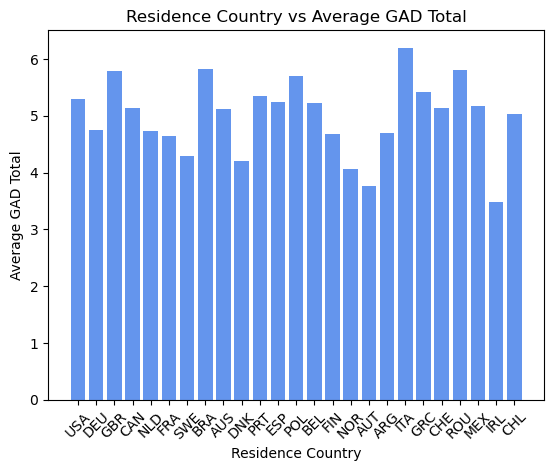

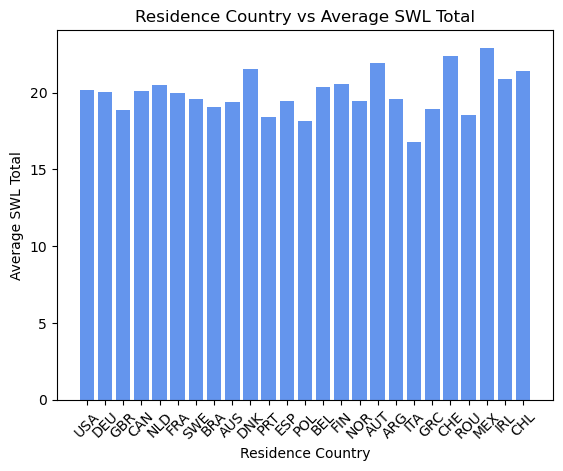

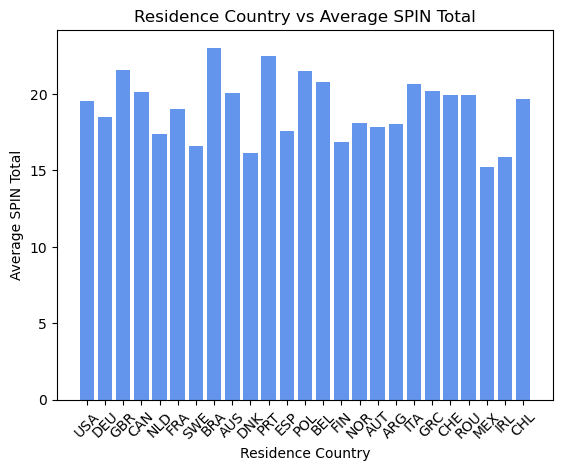

In [53]:
# plot scatter plots for each test total 

x=avgsummary.index

for column in avgsummary.columns:
    plt.figure()
    plt.bar(x,avgsummary[column],color="cornflowerblue")
    plt.xticks(rotation=45)
    plt.title(f"Residence Country vs {column}")
    plt.xlabel("Residence Country")
    plt.ylabel(column);


In [56]:
# Change total columns back into int
gamingtotal=gaming25_df.copy()
gamingtotal['GAD Total']=gamingtotal['GAD Total'].astype(int)
gamingtotal['SWL Total']=gamingtotal['SWL Total'].astype(int)
gamingtotal['SPIN Total']=gamingtotal['SWL Total'].astype(int)

# Create age bins
gbins = [4,9,14,15,50]
sbins = [5,9,14,19,20,25,30,35]
spbins = [0,20,30,40,50,68]

# Create labels for said bins
g_labels = ["0 to 4", "5 to 9", "10 to 14", "15 to 50"]
s_labels = ["5 to 9","10 to 14","15 to 19", "20","21 to 25","26 to 30","31 to 35"]
sp_labels =["0 to 20", "21 to 30","31 to 40","41 to 50","51 to 68"]

# Bin the data
gamingtotal["GAD Total"] = pd.cut(gamingtotal["GAD Total"], gbins, labels=g_labels)
gamingtotal["SWL Total"] = pd.cut(gamingtotal["SWL Total"], sbins, labels=s_labels)
gamingtotal["SPIN Total"] = pd.cut(gamingtotal["SPIN Total"], spbins, labels=sp_labels)

ValueError: Cannot convert float NaN to integer